# Import libraries

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

In [13]:
def display_image(img):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [14]:
def display_multiple_images(images, row, col, figsize=(6, 6)):
    images = [[data[0], ""] if len(data) == 1 else data for data in images]
    _, axs = plt.subplots(row, col, figsize=figsize)
    axs = axs.flatten()
    for (image, title), ax in zip(images, axs):
        ax.imshow(image, cmap="gray")
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Extract and transform image

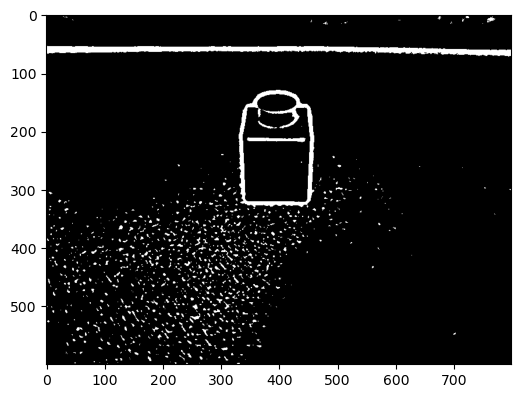

In [15]:
image = cv.imread("../data/input/lateral_cube.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Convert the image to grayscale and blur it slightly
# Blurring the image helps remove some of the high frequency edges in the image and allow a more clean segmentation
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
blur_image = cv.GaussianBlur(gray_image, (7, 7), 0)

thresh_image = cv.adaptiveThreshold(blur_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 21, 4)
display_image(thresh_image)

# Morphological Operations

##
***
$\mathbf{\text{Erosion}}$<br>
***
$$
dst(x,y) = \min_{(x',y'): element (x',y') \neq 0} src(x + x',y + y')
$$

The three arguments of the cv.erode function are:
- First: The image to erode
- Second: The structuring element, that when setted to None uses a 3x3 8-neighborhood structuring element
- Third: The number of iteration we are going to apply

In [16]:
image_eroded_1 = cv.erode(thresh_image, None, iterations=1)
image_eroded_2 = cv.erode(thresh_image, None, iterations=2)
image_eroded_3 = cv.erode(thresh_image, None, iterations=3)

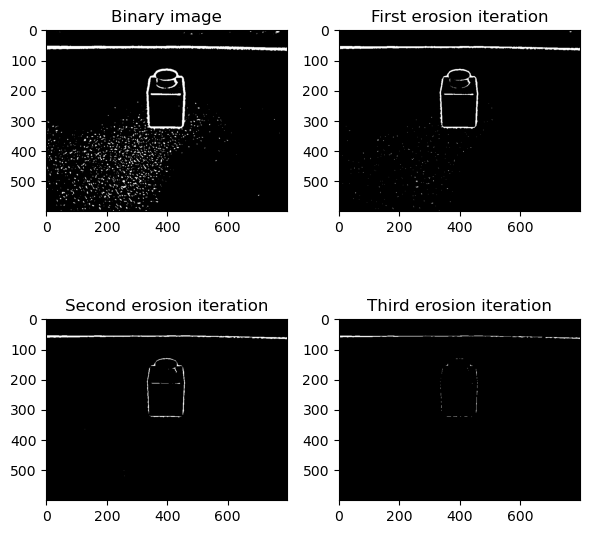

In [17]:
display_multiple_images([
    [thresh_image, "Binary image"], 
    [image_eroded_1, "First erosion iteration"], 
    [image_eroded_2, "Second erosion iteration"], 
    [image_eroded_3, "Third erosion iteration"]], 
    2, 2)

##
***
$\mathbf{\text{Dilation}}$<br>
***
$$
dst(x,y) = \max_{(x',y'): element (x',y') \neq 0} src(x + x',y + y')
$$

The three arguments of the cv.dilate function are:
- First: The image to dilate
- Second: The structuring element, that when setted to None uses a 3x3 8-neighborhood structuring element 
- Third: The number of iteration we are going to apply

In [18]:
image_dilated_1 = cv.dilate(thresh_image, None, iterations=1)
image_dilated_2 = cv.dilate(thresh_image, None, iterations=2)
image_dilated_3 = cv.dilate(thresh_image, None, iterations=3)

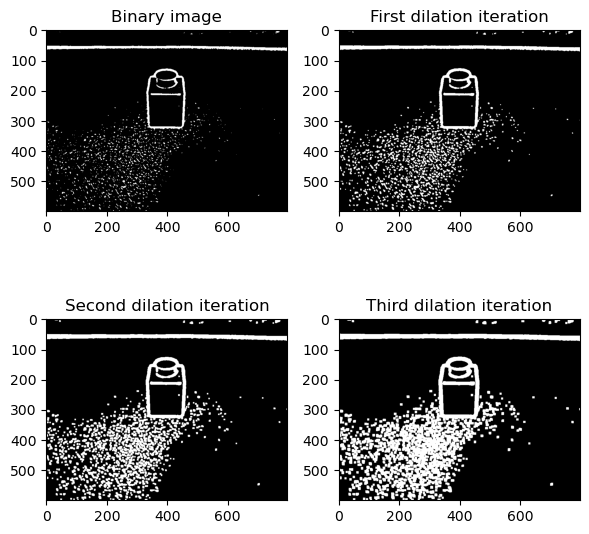

In [19]:
display_multiple_images([
    [thresh_image, "Binary image"], 
    [image_dilated_1, "First dilation iteration"], 
    [image_dilated_2, "Second dilation iteration"], 
    [image_dilated_3, "Third dilation iteration"]], 
    2, 2)

## 
***
$\mathbf{\text{Opening}}$<br>
***
The opening morphological operation function:
$$dst = open(src,element) = dilate(erode(src,element))$$

- Structuring element shapes

    - MORPH_RECT:
        $$E_{ij} = 1$$

    - MORPH_CROSS:
        $$
        E_{ij} = \left\{
            \begin{array}{ll}
                1 & if i = anchor.y or j = anchor.x \\
                0 & otherwise
            \end{array}
            \right.
        $$

    - MORPH_ELLIPSE: An elliptic structuring element, that is, a filled ellipse inscribed into the rectangle Rect(0, 0, esize.width, 0.esize.height)

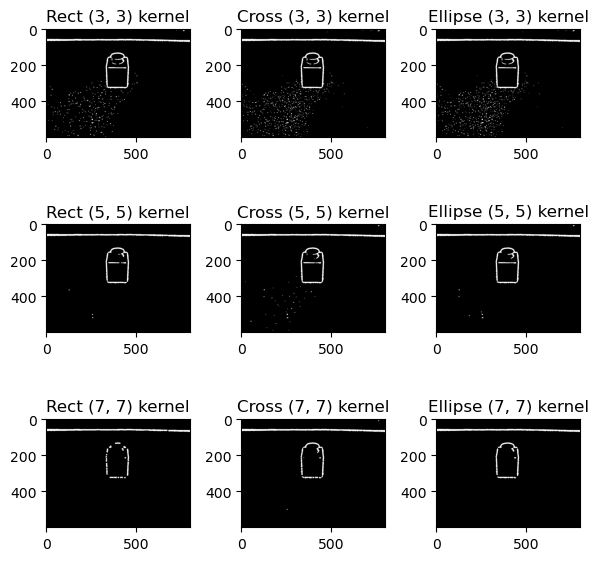

In [20]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
images =  []

for kernel_size in kernel_sizes:
    # Construct a rectangular kernel from the current size and then apply an opening operation
    rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS, kernel_size)
    ellipse_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, kernel_size)
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_OPEN, rect_kernel), "Rect {} kernel".format(kernel_size)])
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_OPEN, cross_kernel), "Cross {} kernel".format(kernel_size)])
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_OPEN, ellipse_kernel), "Ellipse {} kernel".format(kernel_size)])

display_multiple_images(images, 3, 3)

## 
***
$\mathbf{\text{Closing}}$<br>
***
The closing morphological operation function:
$$dst = open(src,element) = erode(dilate(src,element))$$

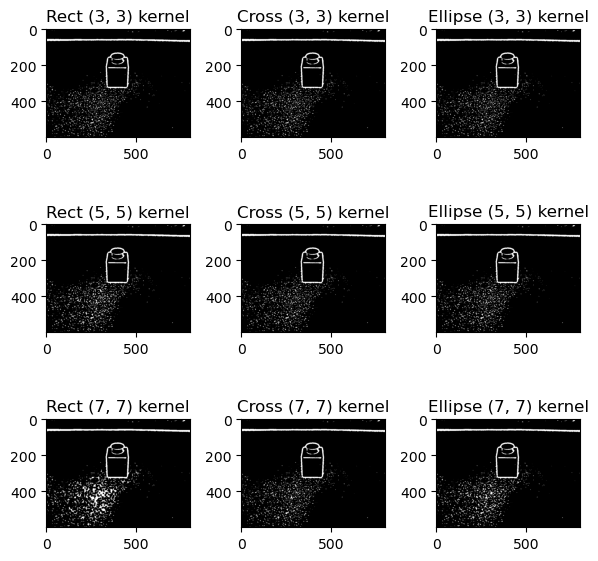

In [21]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
images =  []

for kernel_size in kernel_sizes:
    # Construct a rectangular kernel from the current size and then apply a closing operation
    rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS, kernel_size)
    ellipse_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, kernel_size)
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_CLOSE, rect_kernel), "Rect {} kernel".format(kernel_size)])
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_CLOSE, cross_kernel), "Cross {} kernel".format(kernel_size)])
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_CLOSE, ellipse_kernel), "Ellipse {} kernel".format(kernel_size)])

display_multiple_images(images, 3, 3)

## 
***
$\mathbf{\text{Gradient}}$<br>
***
The gradient morphological operation function:
$$dst = morphgrad(src,element) = dilate(src,element) - erode(src,element)$$

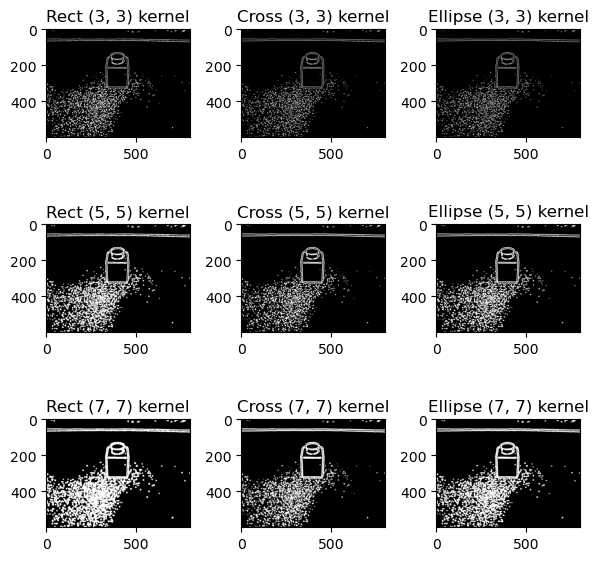

In [22]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
images =  []

for kernel_size in kernel_sizes:
    # Construct a rectangular kernel from the current size and then apply a closing operation
    rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS, kernel_size)
    ellipse_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, kernel_size)
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_GRADIENT, rect_kernel), "Rect {} kernel".format(kernel_size)])
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_GRADIENT, cross_kernel), "Cross {} kernel".format(kernel_size)])
    images.append([cv.morphologyEx(thresh_image, cv.MORPH_GRADIENT, ellipse_kernel), "Ellipse {} kernel".format(kernel_size)])

display_multiple_images(images, 3, 3)

## 
***
$\mathbf{\text{Top hat/White hat}}$<br>
***
The Top hat/White hat morphological operation function:
$$dst = tophat(src,element) = src - open(src,element)$$

In [31]:
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
top_hat = cv.morphologyEx(gray_image, cv.MORPH_TOPHAT, rect_kernel)

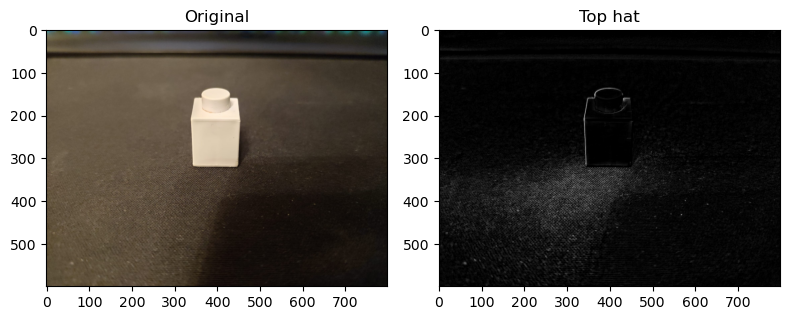

In [35]:
display_multiple_images([
        [image, "Original"],
        [top_hat, "Top hat"]],
    1, 2, figsize=(8, 8)
)

## 
***
$\mathbf{\text{Black hat}}$<br>
***
The Black hat morphological operation function:
$$dst = blackhat(src,element) = close(src,element) - src$$

In [36]:
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
black_hat = cv.morphologyEx(gray_image, cv.MORPH_BLACKHAT, rect_kernel)

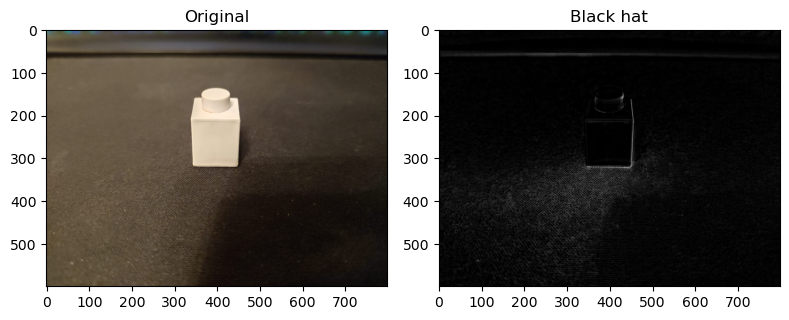

In [37]:
display_multiple_images([
        [image, "Original"],
        [black_hat, "Black hat"]],
    1, 2, figsize=(8, 8)
)